In [58]:
import networkx as nx
import random
import numpy as np
from collections import defaultdict

## Create Dummy Graph

In [59]:
random.seed(42)
dummy = nx.DiGraph()
num_nodes = 5
prob = 0.3
dummy.add_nodes_from(range(num_nodes))
for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j and random.random() < prob:
            weight = random.uniform(100, 500)
            dummy.add_edge(i, j, weight=weight)

print("Edge weights:")
for edge in dummy.edges:
    print(f"{edge}: {dummy.edges[edge]['weight']}")



Edge weights:
(0, 2): 210.0117273476477
(0, 3): 394.58848566560494
(1, 2): 268.7687278741082
(1, 3): 187.45518992144133
(2, 0): 179.5350602746594
(2, 4): 335.70627355036345
(3, 1): 422.32770073312315
(4, 0): 482.88522888271245
(4, 2): 138.68655073338562


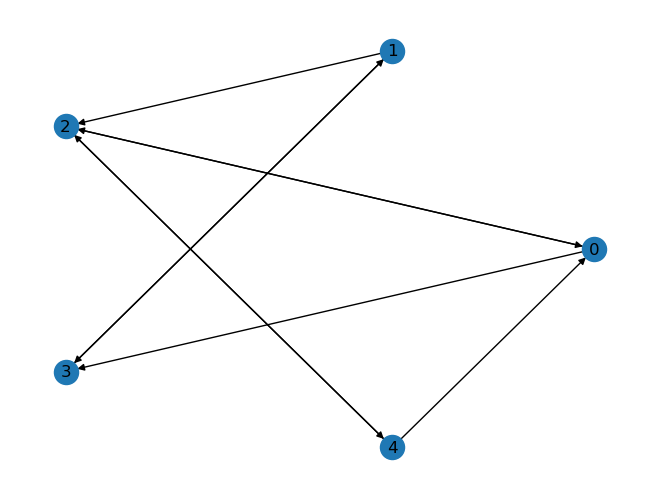

In [60]:
nx.draw(dummy, pos=nx.circular_layout(dummy), with_labels=True, node_size=300)

## Create Transition Matrix

In [61]:
trans_matrix = np.zeros((num_nodes, num_nodes))

for node in dummy.nodes:
    out_weights = [dummy.edges[edge]["weight"] for edge in dummy.out_edges(node, data=False)]
    total_weights = sum(out_weights)
    if total_weights > 0:
        trans_matrix[node, [j for i, j in dummy.out_edges(node)]] = [w / total_weights for w in out_weights]
# Make column stochastic
col_stoch_trans_matrix = trans_matrix.T

In [62]:
col_stoch_trans_matrix

array([[0.        , 0.        , 0.34844848, 0.        , 0.77687766],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.34735636, 0.58911582, 0.        , 0.        , 0.22312234],
       [0.65264364, 0.41088418, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.65155152, 0.        , 0.        ]])

## Run Random Walk

In [63]:
# Referenced https://stackoverflow.com/questions/37311651/get-node-list-from-random-walk-in-networkx

# Initialize dict of visited pages
visited = defaultdict(int)

# Set walk length
walk_length = 3

# Set starting node
page = np.array([1, 0, 0, 0, 0]).reshape(-1,1)

# Run random walk
for step in range(walk_length):
    page = np.dot(col_stoch_trans_matrix, page)
    visit = np.argmax(page)
    visited[visit] += 1

visited

defaultdict(int, {3: 1, 1: 1, 2: 1})